In [4]:
import pandas as pd
import numpy as np

In [6]:
crop = pd.read_csv("/content/sample_data/crop_recommendation_bhopal.csv")

In [7]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,60,60,44,25.27,71.16,5.90,450.21,wheat
1,90,44,38,25.86,63.94,5.99,712.90,wheat
2,83,44,46,23.78,67.68,7.29,461.33,wheat
3,71,55,42,23.28,69.93,7.11,779.43,wheat
4,98,38,36,24.90,66.59,5.52,515.13,wheat


In [8]:
crop.shape

(500, 8)

In [9]:
crop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            500 non-null    int64  
 1   P            500 non-null    int64  
 2   K            500 non-null    int64  
 3   temperature  500 non-null    float64
 4   humidity     500 non-null    float64
 5   ph           500 non-null    float64
 6   rainfall     500 non-null    float64
 7   label        500 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 31.4+ KB


In [10]:
crop.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [11]:
crop.duplicated().sum()


np.int64(0)

In [12]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,45.568000,37.400000,34.80600,25.021920,70.042160,6.401820,747.534340
std,26.371429,10.371264,9.03236,4.158617,8.487153,0.508356,271.457017
min,10.000000,20.000000,20.00000,17.060000,50.330000,5.010000,304.650000
25%,25.000000,30.000000,27.00000,21.940000,63.727500,6.050000,542.812500
50%,35.000000,37.000000,35.00000,24.660000,70.010000,6.430000,713.885000
75%,63.250000,44.000000,41.00000,28.335000,76.507500,6.800000,911.565000
max,120.000000,60.000000,60.00000,34.880000,89.910000,7.480000,1598.690000


In [16]:
crop.label.value_counts()


,count
label,
wheat,50
soybean,50
gram,50
paddy,50
maize,50
mustard,50
lentil,50
urad,50
groundnut,50


In [17]:
crop['label'].unique().size


10

<ipython-input-18-eaf3da0da963>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


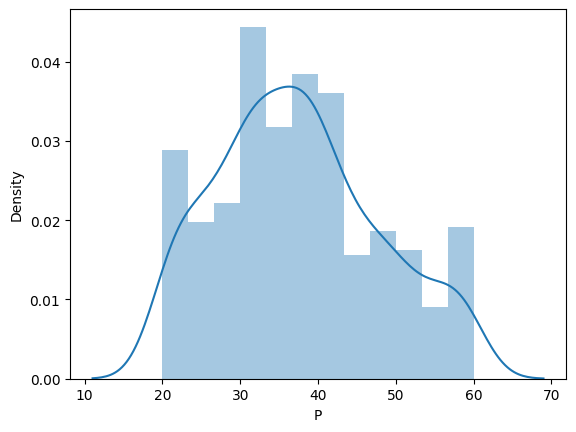

In [18]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

<ipython-input-19-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


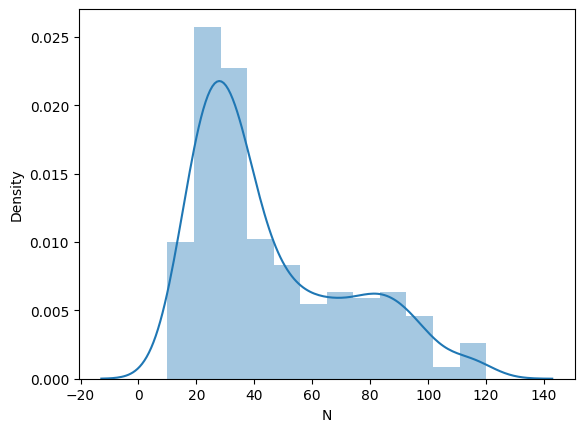

In [19]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [20]:
crop.label.unique()


array(['wheat', 'soybean', 'gram', 'paddy', 'maize', 'mustard', 'lentil',
       'urad', 'groundnut', 'tomato'], dtype=object)

In [21]:
crop_dict={
    'wheat': 1,
    'soybean': 2,
    'gram': 3,
    'paddy': 4,
    'maize': 5,
    'mustard': 6,
    'lentil': 7,
    'urad': 8,
    'groundnut': 9,
    'tomato': 10,
}

crop['label'] = crop['label'].map(crop_dict)

In [22]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,60,60,44,25.27,71.16,5.90,450.21,1
1,90,44,38,25.86,63.94,5.99,712.90,1
2,83,44,46,23.78,67.68,7.29,461.33,1
3,71,55,42,23.28,69.93,7.11,779.43,1
4,98,38,36,24.90,66.59,5.52,515.13,1


In [23]:
crop.label.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
crop.label.value_counts()


,count
label,
1,50
2,50
3,50
4,50
5,50
6,50
7,50
8,50
9,50


In [25]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [26]:
X.head()


,N,P,K,temperature,humidity,ph,rainfall
0,60,60,44,25.27,71.16,5.90,450.21
1,90,44,38,25.86,63.94,5.99,712.90
2,83,44,46,23.78,67.68,7.29,461.33
3,71,55,42,23.28,69.93,7.11,779.43
4,98,38,36,24.90,66.59,5.52,515.13


In [27]:
y.head()


,label
0,1
1,1
2,1
3,1
4,1


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
X_train.shape


(400, 7)

In [30]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [31]:
X_train


array([[0.64545455, 0.725     , 0.3       , ..., 0.57537889, 0.25506073,
        0.2064945 ],
       [0.1       , 0.05      , 0.275     , ..., 0.8537623 , 0.43724696,
        0.43828592],
       [0.62727273, 0.525     , 0.625     , ..., 0.61499601, 0.85020243,
        0.49360402],
       ...,
       [0.10909091, 0.475     , 0.45      , ..., 0.11592662, 0.68421053,
        0.03996618],
       [0.12727273, 0.35      , 0.075     , ..., 0.63281042, 0.6437247 ,
        0.17930478],
       [0.06363636, 0.675     , 0.625     , ..., 0.32677479, 0.89068826,
        0.0013653 ]])

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [34]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.81
GaussianNB model with accuracy: 0.85
SVC model with accuracy: 0.82
KNeighborsClassifier model with accuracy: 0.72
DecisionTreeClassifier model with accuracy: 0.73
ExtraTreeClassifier model with accuracy: 0.71
RandomForestClassifier model with accuracy: 0.87
BaggingClassifier model with accuracy: 0.82
GradientBoostingClassifier model with accuracy: 0.83
AdaBoostClassifier model with accuracy: 0.28


In [36]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

In [37]:
crop.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [38]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [39]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,60,60,44,25.27,71.16,5.90,450.21,1
1,90,44,38,25.86,63.94,5.99,712.90,1
2,83,44,46,23.78,67.68,7.29,461.33,1
3,71,55,42,23.28,69.93,7.11,779.43,1
4,98,38,36,24.90,66.59,5.52,515.13,1


In [40]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [41]:
predict

array([10])

In [42]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))